In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 

In [2]:
pd.set_option("display.max_columns", None)

## 1- Listagem dos path dos arquivos csv

In [3]:
# variaveis que guardam os locais aonde estao localizados os arquivos que são a base para os dataframes

# base 1

#1
path_customers = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_customers_dataset.csv'

#2
path_orders = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_dataset.csv'

#3
path_orders_items = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_items_dataset.csv'

#4
path_products_specs = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_products_dataset.csv'

#5
path_orders_payment = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_payments_dataset.csv'

#6
path_orders_reviews = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_reviews_dataset.csv'

#7
path_sellers = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_sellers_dataset.csv'

# base 2
path_atlas = 'd:/tcc_puc_minas/censo_atlas/atlas_municipios_2010.xlsx'

# base 3


## 2 - Funcões que auxiliam na análise dos dataframes

In [4]:
# funcao que exibe o shape, se há registros duplicados e se há registros nulos

def basic_summary(dataframe,isna_num_comp=0):
    print('shape:')
    print(dataframe.shape,'\n')
    print('duplicated().sum():')
    print(dataframe.duplicated().sum(),'\n')
    print('isna().sum():')
    isna_series = dataframe.isna().sum()
    print(isna_series[isna_series > isna_num_comp],'\n')
    print('head():')
    display(dataframe.head())  

In [5]:
# funcao que da o shape do dataframe e conta quantos valores unicos ha em cada campo.

def df_unique(df):
    print(df.shape,'\n')
    print(df.nunique(),'\n')    

## 3 - Analise primaria dos dataframes

### 3.1 - Análise de olist_customers_dataset.csv transformado no dataframe df_customers

In [6]:
#1
path_customers = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_customers_dataset.csv'

# "customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"
df_customers = pd.read_csv(path_customers)

basic_summary(df_customers)

shape:
(99441, 5) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 3.2 - Análise de olist_orders_dataset.csv transformado em df_orders

In [7]:
#2
path_orders = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_dataset.csv'

# "order_id","customer_id","orders_status","orders_purchase_timestamp","orders_approved_at","orders_delivered_carrier_date","orders_delivered_customer_date","orders_estimated_delivery_date"
df_orders = pd.read_csv(path_orders)

basic_summary(df_orders)

shape:
(99441, 8) 

duplicated().sum():
0 

isna().sum():
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64 

head():


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


> Neste dataframe há linhas com elementos NaN que devem ser analisados

In [8]:
#2

df_orders[df_orders.isna().any(axis='columns')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [9]:
display(df_orders[~df_orders['order_delivered_customer_date'].isna()])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
# listando as linhas que nao possuem NaN para o campo order_delivered_customer_date

df_orders = df_orders[~df_orders['order_delivered_customer_date'].isna()]

basic_summary(df_orders)

shape:
(96476, 8) 

duplicated().sum():
0 

isna().sum():
order_approved_at               14
order_delivered_carrier_date     1
dtype: int64 

head():


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
display(df_orders[df_orders['order_approved_at'].isna()])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


In [12]:
display(df_orders[df_orders['order_delivered_carrier_date'].isna()])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00


In [13]:
#2

df_orders = df_orders.loc[:,['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date']]

basic_summary(df_orders)

shape:
(96476, 4) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02


In [14]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

df_orders.dtypes

order_id                                 object
customer_id                              object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

In [15]:
# criando o campo "dias_entrega"

df_orders['dias_entrega'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days

print(df_orders.dtypes)

display(df_orders.head())

order_id                                 object
customer_id                              object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dias_entrega                              int64
dtype: object


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,dias_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2


In [16]:
# remoção das datas

df_orders = df_orders.loc[:,['order_id','customer_id','dias_entrega']]

basic_summary(df_orders)

shape:
(96476, 3) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,customer_id,dias_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2


###  3.3 - Analise de olist_orders_items_dataset.csv transformado no dataframe df_orders_items

In [17]:
#3
path_orders_items = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_items_dataset.csv'

df_orders_items = pd.read_csv(path_orders_items)

basic_summary(df_orders_items)

shape:
(112650, 7) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
# analise dos elementos unicos do df_orders_items

df_unique(df_orders_items)

(112650, 7) 

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64 



In [19]:
#3

df_orders_items.drop(columns= ['shipping_limit_date'],inplace=True)

basic_summary(df_orders_items)

shape:
(112650, 6) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [20]:
#3

# analise do campo "order_id" para checar se ha duplicidade

df_orders_items['order_id'].duplicated().sum()

13984

In [21]:
#3

# listagem das linhas que contem os elementos dos campo "order_id" em duplicidade

display(df_orders_items[df_orders_items['order_id'].duplicated(keep=False)].sort_values(by='order_id'))

,order_id,order_item_id,product_id,seller_id,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
...,...,...,...,...,...,...
112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19


###  3.4 - Análise de olist_products_dataset.csv transformado em df_products_specs

In [22]:
#4
path_products_specs = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_products_dataset.csv'

df_products_specs = pd.read_csv(path_products_specs)

basic_summary(df_products_specs)

shape:
(32951, 9) 

duplicated().sum():
0 

isna().sum():
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

head():


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
#4

df_products_specs[df_products_specs.isna().any(axis='columns')]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [24]:
#4

# listando as linhas que possuem NaN apenas em product_category_name

df_products_specs = df_products_specs[df_products_specs['product_category_name'].notna()]

basic_summary(df_products_specs)

shape:
(32341, 9) 

duplicated().sum():
0 

isna().sum():
product_weight_g     1
product_length_cm    1
product_height_cm    1
product_width_cm     1
dtype: int64 

head():


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
#4

# como não ha nome da categoria para o product_id, então retirou-se as linhas.

df_products_specs.dropna(inplace=True)

basic_summary(df_products_specs)

shape:
(32340, 9) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
#4

# seleção dos campos a serem utilizados

df_products_specs = df_products_specs.iloc[:,[0,1,4]]

basic_summary(df_products_specs)

shape:
(32340, 3) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0


In [27]:
#4

df_products_specs['product_id'].duplicated().sum()

0

### 3.5 - Análise de olist_orders_payments_dataset.csv transformado em df_orders_payment

In [28]:
#5
path_orders_payment = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_payments_dataset.csv'

df_orders_payment = pd.read_csv(path_orders_payment)

basic_summary(df_orders_payment)

shape:
(103886, 5) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
# analise do campo order_id para checar se há duplicidade

print(df_orders_payment['order_id'].duplicated().sum())

4446


In [30]:
# exibindo linhas com os valores de order_id duplicados

display(df_orders_payment[df_orders_payment['order_id'].duplicated(keep=False)].sort_values(by='order_id').head(30))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75


> Podemos ver no detalhe que para uma mesmo valor de “order_id” temos mais de um valor para “payment_type”.

In [31]:
print(df_orders_payment['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [32]:
# contagem de payment_type

print(df_orders_payment['payment_type'].value_counts())

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


In [33]:
# contagem de payment_type normalized

print(df_orders_payment['payment_type'].value_counts(normalize=True))

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64


In [34]:
# selecionando apenas as linhas que contêm credit_card ou boleto para o campo payment_type

df_payment_bol_card = df_orders_payment[(df_orders_payment['payment_type'] == 'boleto') | (df_orders_payment['payment_type'] == 'credit_card')].copy()

display(df_payment_bol_card)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [35]:
df_payment_bol_card_dup = df_payment_bol_card[df_payment_bol_card['order_id'].duplicated(keep=False)].sort_values(by='order_id')
display(df_payment_bol_card_dup)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
49201,01358622f65717728b3b2ec2cf4e8812,2,credit_card,1,14.80
101820,01358622f65717728b3b2ec2cf4e8812,1,credit_card,1,6.97
79945,02d0cd05f04ab2e3c1acc473b0abc865,2,credit_card,2,29.64
99441,02d0cd05f04ab2e3c1acc473b0abc865,1,credit_card,3,56.40
11055,033ccfbdfc4d29677b7e1e6df3a82820,1,credit_card,3,30.82
...,...,...,...,...,...
58306,febdd4292b7bc064ae8e10f572aa2ce9,1,credit_card,3,182.00
41032,fee9afa24ed743a26803c4d03e8ba5e1,1,credit_card,3,37.89
87715,fee9afa24ed743a26803c4d03e8ba5e1,2,credit_card,2,23.89
28537,ffc730a0615d28ec19f9cad02cb41442,2,credit_card,1,12.63


In [36]:
tot_payment_value_bol_card = df_payment_bol_card['payment_value'].sum()
tot_payment_value_bol_card_duplicated = df_payment_bol_card_dup['payment_value'].sum()

print('valor total para boletos e cartoes: ',tot_payment_value_bol_card)
print('valor total para boletos e cartoes order_id duplicados: ',tot_payment_value_bol_card_duplicated)
print('percentual valor total para boletos e cartoes order_id duplicados sobre valor total para boletos e cartoes: '
      ,(tot_payment_value_bol_card_duplicated/tot_payment_value_bol_card)*100, '%')

valor total para boletos e cartoes:  15411445.46
valor total para boletos e cartoes order_id duplicados:  101956.83
percentual valor total para boletos e cartoes order_id duplicados sobre valor total para boletos e cartoes:  0.66156565433545 %


In [37]:
# retirada dos duplicados da tabela atraves dos indices do dataframe duplicados

df_payment_bol_card.drop(df_payment_bol_card_dup.index,inplace=True)

basic_summary(df_payment_bol_card)

shape:
(95999, 5) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [38]:
# verificando se a tabela consta duplicidade para order_id

df_payment_bol_card['order_id'].duplicated().sum()

0

In [39]:
# renomação do dataframe
df_orders_payment = df_payment_bol_card.copy()

display(df_orders_payment)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [40]:
# verificação dos valores unicos de payment_type
print(df_orders_payment['payment_type'].unique())

['credit_card' 'boleto']


### 3.6 - Análise de olist_orders_reviews_dataset.csv transformado em df_orders_reviews

In [41]:
#6 

path_orders_reviews = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_orders_reviews_dataset.csv'

df_orders_reviews = pd.read_csv(path_orders_reviews)

basic_summary(df_orders_reviews)

shape:
(100000, 7) 

duplicated().sum():
0 

isna().sum():
review_comment_title      88285
review_comment_message    58247
dtype: int64 

head():


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [42]:
#6

df_orders_reviews =  df_orders_reviews.iloc[:,[1,2,5,6]]

basic_summary(df_orders_reviews)

shape:
(100000, 4) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,review_score,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [43]:
# checahdno se há duplicidade de valores no campo order_id

print(df_orders_reviews['order_id'].duplicated().sum())

559


In [44]:
# linhas que possuem valores repetidos

display(df_orders_reviews[df_orders_reviews['order_id'].duplicated(keep=False)]\
        .sort_values(['order_id','review_creation_date'], ascending=[True,False])\
        .head(10))

,order_id,review_score,review_creation_date,review_answer_timestamp
25802,0035246a40f520710769010f752e7507,5,2017-08-29 00:00:00,2017-08-30 01:59:12
22585,0035246a40f520710769010f752e7507,5,2017-08-25 00:00:00,2017-08-29 21:45:57
69191,013056cfe49763c6f66bda03396c5ee3,4,2018-03-04 00:00:00,2018-03-05 17:02:00
22946,013056cfe49763c6f66bda03396c5ee3,5,2018-02-22 00:00:00,2018-02-23 12:12:30
857,0176a6846bcb3b0d3aa3116a9a768597,5,2017-12-30 00:00:00,2018-01-02 10:54:06
83893,0176a6846bcb3b0d3aa3116a9a768597,5,2017-12-30 00:00:00,2018-01-02 10:54:47
17708,02355020fd0a40a0d56df9f6ff060413,1,2018-03-29 00:00:00,2018-03-30 03:16:19
90601,02355020fd0a40a0d56df9f6ff060413,3,2018-03-21 00:00:00,2018-03-22 01:32:08
55564,029863af4b968de1e5d6a82782e662f5,4,2017-07-19 00:00:00,2017-07-20 12:06:11
38195,029863af4b968de1e5d6a82782e662f5,5,2017-07-14 00:00:00,2017-07-17 13:58:06


In [45]:
# retirando o campo review_answer_timestamp

df_orders_reviews = df_orders_reviews.iloc[:,[0,1,2]]

basic_summary(df_orders_reviews)

shape:
(100000, 3) 

duplicated().sum():
126 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,review_score,review_creation_date
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00
3,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00


In [46]:
# agregacao deixando o max de review_creation_date e assim tendo o valor de review_score
# mais atualizado em caso de mais de um valor para o campo order_id

df_orders_reviews = df_orders_reviews.groupby('order_id').agg({'review_score':'max','review_creation_date':'max'})
df_orders_reviews.columns = ['review_score','review_creation_date']
df_orders_reviews = df_orders_reviews.reset_index()

basic_summary(df_orders_reviews)

shape:
(99441, 3) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-21 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-13 00:00:00
2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-02 00:00:00


In [47]:
# conferindo se há valores duplicados para order_id

print(df_orders_reviews['order_id'].duplicated().sum())

0


In [48]:
df_orders_reviews = df_orders_reviews.iloc[:,[0,1]]

basic_summary(df_orders_reviews)

shape:
(99441, 2) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5
1,00018f77f2f0320c557190d7a144bdd3,4
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5


### 3.7 - Análise de olist_sellers_dataset.csv transformado em df_sellers

In [49]:
#7
path_sellers = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/olist_sellers_dataset.csv'

df_sellers = pd.read_csv(path_sellers)

basic_summary(df_sellers)

shape:
(3095, 4) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [50]:
# retirando o campo seller_zip_code_prefix

df_sellers = df_sellers.loc[:,df_sellers.columns != 'seller_zip_code_prefix']

basic_summary(df_sellers)

shape:
(3095, 3) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


In [51]:
# conferindo se há algum valor de seller_id duplicado no dataframe

print(df_sellers['seller_id'].duplicated().sum())

0


### 3.8 - Análise de product_category_name_translation transformado em df_prod_cat_name_translation

In [52]:
#8

path_product_translation = 'd:/tcc_puc_minas/brazilian_ecomerce_public_dataset_by_olist/product_category_name_translation.csv'

df_prod_cat_name_translation = pd.read_csv(path_product_translation)

basic_summary(df_prod_cat_name_translation)

shape:
(71, 2) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 3.9 - Análise da base atlas que foi transfomada no dataframe df_atlas

In [53]:
# path_atlas = 'd:/tcc_puc_minas/censo_atlas/atlas_municipios_2010.xlsx'

# df_atlas = pd.read_excel(path_atlas)

# basic_summary(df_atlas)

In [54]:
# foi criada uma versão em csv do arquivo atlas_municipios_2010.xlsx para se ter uma leitura mais rapida da base

# path_atlas_csv = 'd:/tcc_puc_minas/censo_atlas/atlas_municipios_2010.csv'

# df_atlas.to_csv(path_atlas_csv,index=False)

In [55]:
# leitura do arquivo gravado para o formato csv

path_atlas_csv = 'd:/tcc_puc_minas/censo_atlas/atlas_municipios_2010.csv'

df_atlas = pd.read_csv(path_atlas_csv)

basic_summary(df_atlas)

shape:
(5565, 237) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_0_BASICO,T_ATRASO_0_FUND,T_ATRASO_0_MED,T_ATRASO_1_BASICO,T_ATRASO_1_FUND,T_ATRASO_1_MED,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,T_FBBAS,T_FBFUND,T_FBMED,T_FBPRE,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLPRE,T_FLSUPER,T_FREQ0A3,T_FREQ11A14,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ4A5,T_FREQ4A6,T_FREQ5A6,T_FREQ6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQFUND45,T_FREQMED1824,T_FREQMED614,T_FREQSUPER1517,T_FUND11A13,T_FUND12A14,T_FUND15A17,T_FUND16A18,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED19A21,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,RDPC1,RDPC10,RDPC2,RDPC3,RDPC4,RDPC5,RDPCT,RIND,RMPOB,RPOB,THEIL,CPR,EMP,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_FORMAL,P_FUND,P_MED,P_SERV,P_SIUP,P_SUPER,P_TRANSF,REN0,REN1,REN2,REN3,REN5,RENOCUP,T_ATIV,T_ATIV1014,T_ATIV1517,T_ATIV1824,T_ATIV18M,T_ATIV2529,T_DES,T_DES1014,T_DES1517,T_DES1824,T_DES18M,T_DES2529,THEILtrab,TRABCC,TRABPUB,TRABSC,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,T_CRIFUNDIN_TODOS,T_FORA4A5,T_FORA6A14,T_FUNDIN_TODOS,T_FUNDIN_TODOS_MMEIO,T_FUNDIN18MINF,T_M10A14CF,T_M15A17CF,T_MULCHEFEFIF014,T_NESTUDA_NTRAB_MMEIO,T_OCUPDESLOC_1,T_RMAXIDOSO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMEMTOT,HOMENS80,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,peso1,PESO1114,PESO1113,PESO1214,peso13,PESO15,peso1517,PESO1524,PESO1618,PESO18,Peso1820,PESO1824,Peso1921,PESO25,peso4,peso5,peso6,PESO610,Peso617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,pesoRUR,pesotot,pesourb,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,110002,1100023,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200.0,335.00,506.67,836.67,1252.40,0.53,4.36,6.65,11.54,18.76,29.04,4

### 3.10 - Análise da base ibge que foi transfomada no dataframe df_ibge

In [56]:
path_ibge = 'd:/tcc_puc_minas/ibge/Base_ESTADIC_2019.xlsx'

# a aba de planilha de interesse é a "Variáveis Externas" que é a ultima da lista
# então o argumento sheet_name = -1 pega os valores desta planilha

df_ibge = pd.read_excel(path_ibge, sheet_name=-1)

basic_summary(df_ibge)

shape:
(27, 5) 

duplicated().sum():
0 

isna().sum():
Unnamed: 4    27
dtype: int64 

head():


,REGIAO,COD UF,UF,NOME UF,Unnamed: 4
0,Norte,11,RO,RONDÔNIA,NaN
1,Norte,12,AC,ACRE,NaN
2,Norte,13,AM,AMAZONAS,NaN
3,Norte,14,RR,RORAIMA,NaN
4,Norte,15,PA,PARÁ,NaN


In [57]:
# retirada do campo 'Unnamed: 4'

df_ibge = df_ibge.iloc[:,0:4]

basic_summary(df_ibge)

shape:
(27, 4) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,REGIAO,COD UF,UF,NOME UF
0,Norte,11,RO,RONDÔNIA
1,Norte,12,AC,ACRE
2,Norte,13,AM,AMAZONAS
3,Norte,14,RR,RORAIMA
4,Norte,15,PA,PARÁ


### 3.11 – Junção dos dataframes

#### 3.11.1 -  Análise dos campos comuns aos dataframes para as junções

In [58]:
# lista dos dataframes

lista_dataframes = [df_customers,
                    df_orders,
                    df_orders_items,
                    df_products_specs,
                    df_orders_payment,
                    df_orders_reviews,
                    df_sellers,
                    df_atlas,
                    df_ibge]

In [59]:
# função que processa os nomes dos campos para minusculo
'''
def nome_campo_minusculo(dataframe):
   dataframe.columns = [i.lower() for i in dataframe.columns]
'''

'\ndef nome_campo_minusculo(dataframe):\n   dataframe.columns = [i.lower() for i in dataframe.columns]\n'

In [60]:
# processamento dos lables dos campos

'''
for dataframe in lista_dataframes:
    nome_campo_minusculo(dataframe)
    display(dataframe.head(1))
'''

'\nfor dataframe in lista_dataframes:\n    nome_campo_minusculo(dataframe)\n    display(dataframe.head(1))\n'

In [61]:
# alteração da função nome_campo_minusculo para acrescentar a parte que substitui os espacços por "_"

def nome_campo_minusculo_sem_espaco(dataframe):
    dataframe.columns = [i.lower().replace(' ','_') for i in dataframe.columns]

In [62]:
# processamento dos lables dos dataframes

for dataframe in lista_dataframes:
    nome_campo_minusculo_sem_espaco(dataframe)
    display(dataframe.head(1))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


,order_id,customer_id,dias_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8


,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29


,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5


,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP


,ano,uf,codmun6,codmun7,município,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,94.5,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.0,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.4,21.23,85.25,92.88,34.6,34.15,10.5,4.89,95.55,79.6,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.6,36.8,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.8,368.9,586.67,877.0,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.6,34.73,2.83,38.56,13.78,5.31,0.0,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.8,88.52,95.9,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.2,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.0,6.75,14.51,16.12,1.15,2.2,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657


,regiao,cod_uf,uf,nome_uf
0,Norte,11,RO,RONDÔNIA


In [63]:
# renomacao do campo "uf" para "cod_uf" e "município" para "municipio" (sem acento)

df_atlas.rename(columns={'uf':'cod_uf','município':'municipio'},inplace=True)

basic_summary(df_atlas)

shape:
(5565, 237) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,ano,cod_uf,codmun6,codmun7,municipio,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,110002,1100023,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200.0,335.00,506.67,836.67,1252.40,0.53,4.36,6.65,11.54,18.76,29.

In [64]:
# função que extrai o nome da variável e passa como string

def nome_string_variavel(variavel):
    for name,val in globals().items():
        if val is variavel:
            return name

In [65]:
# criação do dicionario com os campos comnuns aos dataframes para as junçoes

dict_dataframe = dict()

for indice_dataframe_1,dataframe_1 in enumerate(lista_dataframes):
    for campo1 in dataframe_1.columns:
        dataframes_set = set()
        for indice_dataframe_2, dataframe_2 in enumerate(lista_dataframes):
            if indice_dataframe_2 == indice_dataframe_1:
                continue
            if campo1 in dataframe_2.columns:
                #print(indice_dataframe_1,indice_dataframe_2)
                #print(nome_string_variavel(dataframe_1),' -- ',nome_string_variavel(dataframe_2),' -- ',campo1, ' -- ', dataframe_2.columns)
                dataframes_set.add(nome_string_variavel(dataframe_1))
                dataframes_set.add(nome_string_variavel(dataframe_2))
                #print(campo1,' -- ',dataframes_set)
            # print(nome_string_variavel(dataframe_1),' -- ',campo1, '-- ',nome_string_variavel(dataframe_2),' -- ',dataframes_set)
        if len(dataframes_set) > 1:
            dict_dataframe[campo1] = list(dataframes_set)

In [66]:
for k,v in dict_dataframe.items():
    print('campo: ',k, ' --- ','dataframes: ',v)

campo:  customer_id  ---  dataframes:  ['df_customers', 'df_orders']
campo:  order_id  ---  dataframes:  ['df_orders_payment', 'df_orders_reviews', 'df_orders', 'df_orders_items']
campo:  product_id  ---  dataframes:  ['df_orders_items', 'df_products_specs']
campo:  seller_id  ---  dataframes:  ['df_sellers', 'df_orders_items']
campo:  cod_uf  ---  dataframes:  ['df_ibge', 'df_atlas']


In [67]:
# analise dos dataframes dr_orders_review e df_orders_payment

In [68]:
# criacao do dataframe df_orders_items_1

df_orders_items_1 = df_orders_items.iloc[:,[0,4,5]].copy()

basic_summary(df_orders_items_1)

shape:
(112650, 3) 

duplicated().sum():
11080 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


In [69]:
# criação do campo total_value que é a soma de price e freight_value

df_orders_items_1['total_value'] = df_orders_items_1['price'] + df_orders_items_1['freight_value']
basic_summary(df_orders_items_1)

shape:
(112650, 4) 

duplicated().sum():
11080 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [70]:
df_orders_payment_1 = df_orders_payment.iloc[:,[0,4]].copy()

basic_summary(df_orders_payment_1)

shape:
(95999, 2) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45


In [71]:
# agregação com os totais por order_id para o dataframe df_orders_items_1

df_orders_items_1 = df_orders_items_1.groupby('order_id').agg({'price':'sum','freight_value':'sum','total_value':'sum'})
df_orders_items_1.columns = ['price','freight_value','total_value']
df_orders_items_1 = df_orders_items_1.reset_index()

basic_summary(df_orders_items_1)

shape:
(98666, 4) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [72]:
# checando a duplicidade dos valores de order_id

df_orders_items_1.duplicated().sum()

0

In [73]:
# agregacao para df_orders_payment

df_orders_payment_1 = df_orders_payment_1.groupby('order_id').agg({'payment_value':'sum'})
df_orders_payment_1.columns = ['payment_value']
df_orders_payment_1 = df_orders_payment_1.reset_index()

basic_summary(df_orders_payment_1)

shape:
(95999, 2) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [74]:
# juncao dos dataframes df_orders_items 1 com df_orders_payment_1 para poder checar os totais

df_orders_items_payment_merged = pd.merge(df_orders_payment_1,df_orders_items_1,how='left',on='order_id')

basic_summary(df_orders_items_payment_merged)

shape:
(95999, 5) 

duplicated().sum():
0 

isna().sum():
price            681
freight_value    681
total_value      681
dtype: int64 

head():


,order_id,payment_value,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,199.90,18.14,218.04


In [75]:
# listagem dos campos NaN

display(df_orders_items_payment_merged[df_orders_items_payment_merged.isna().any(axis=1)])

,order_id,payment_value,price,freight_value,total_value
24,0010dedd556712d7bb69a19cb7bbd37a,111.12,NaN,NaN,NaN
222,00a500bc03bc4ec968e574c2553bed4b,555.99,NaN,NaN,NaN
262,00bca4adac549020c1273714d04d0208,111.30,NaN,NaN,NaN
298,00d0ffd14774da775ac832ba8520510f,134.49,NaN,NaN,NaN
313,00daac8efd71674d62356c2a306d1e4c,67.97,NaN,NaN,NaN
...,...,...,...,...,...
95004,fd4c3a2912e854eedd463b329540da4b,1395.76,NaN,NaN,NaN
95197,fdcca0e15a4d03e3fb89fb14664a3744,29.59,NaN,NaN,NaN
95223,fddbd183387b5c9bcbafbd0fe965301f,40.00,NaN,NaN,NaN
95528,feae5ecdf2cc16c1007741be785fe3cd,68.53,NaN,NaN,NaN


In [76]:
print(df_orders_payment_1.nunique())
print('\n')
print(df_orders_items_1.nunique())

order_id         95999
payment_value    27801
dtype: int64


order_id         98666
price             7759
freight_value     8004
total_value      31096
dtype: int64


#### 3.12.1 – União dos dataframes “df_customers” e “df_orders”

In [77]:
df = pd.merge(df_customers,df_orders)

basic_summary(df)

shape:
(96476, 7) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,dias_entrega
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,8
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,16
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,26
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,14
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,11


In [78]:
df.drop(columns=['customer_unique_id','customer_zip_code_prefix'], inplace=True)

basic_summary(df)

shape:
(96476, 5) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,customer_id,customer_city,customer_state,order_id,dias_entrega
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,8
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,16
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,26
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,14
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,11


#### 3.12.2 – União dos dataframes “df” e “df_orders_items”

In [79]:
df = pd.merge(df_orders_items,df,how='left',on='order_id')

basic_summary(df)

shape:
(112650, 10) 

duplicated().sum():
0 

isna().sum():
customer_id       2454
customer_city     2454
customer_state    2454
dias_entrega      2454
dtype: int64 

head():


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0


In [80]:
display(df[df.isna().any(axis=1)])

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega
79,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,53.98,23.31,NaN,NaN,NaN,NaN
84,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,39.90,15.38,NaN,NaN,NaN,NaN
260,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,52.99,22.30,NaN,NaN,NaN,NaN
270,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,27.90,9.26,NaN,NaN,NaN,NaN
422,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,154.90,15.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
112211,feebdfdb4759bd4600d52547c81b4fa8,1,0c7536abc1af51a81fa806097dfe3597,7d76b645482be4a332374e8223836592,24.90,21.15,NaN,NaN,NaN,NaN
112256,ff0768e3356919b32e3d7f30baecfcfb,1,b27653c33039497c46ceba21db46a43c,3e8bd881d92466e63ba9e3e809cd3c50,379.90,20.54,NaN,NaN,NaN,NaN
112340,ff358345576214cc9e08488188973c84,1,6803077179d24889430188e03fafd31a,128639473a139ac0f3e5f5ade55873a5,19.90,16.79,NaN,NaN,NaN,NaN
112384,ff536d93ae4214b4d51c2894ccfc569f,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,39.00,8.27,NaN,NaN,NaN,NaN


In [81]:
# removendo as linhas com NaN

df.dropna(inplace=True)

basic_summary(df)

shape:
(110196, 10) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0


#### 3.12.3 – União dos dataframes “df” e “df_product_specs”

In [82]:
df = pd.merge(df, df_products_specs,how='left',on='product_id')

basic_summary(df)

shape:
(110196, 12) 

duplicated().sum():
0 

isna().sum():
product_category_name    1538
product_photos_qty       1538
dtype: int64 

head():


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0,pet_shop,2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0,moveis_decoracao,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0,perfumaria,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0,ferramentas_jardim,1.0


In [83]:
# analise dos casos de NaN

display(df[df.isna().any(axis=1)])

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty
121,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,7.79,7.78,ae55e228ded796581eccc67045516023,sao paulo,SP,3.0,NaN,NaN
123,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,7.60,10.96,baa4ed05f22ffb6c4a41b71b699a492c,juiz de fora,MG,1.0,NaN,NaN
130,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,15.61,a69c820c317aa348d781a9d6732afc23,corumba,MS,23.0,NaN,NaN
140,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,20.30,16.79,c664dc5de5b5f4184bc4ca0285b9f8fe,sinop,MT,19.0,NaN,NaN
169,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,56.00,14.14,97dc92f1aae3a7db8b252d1b8466910e,brasilia,DF,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
109855,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,15.61,442c6e15fe1e8e63a96598607c92bc35,jaragua do sul,SC,12.0,NaN,NaN
109882,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,39.90,9.94,945c975073e57fe39a636afbf6689bcc,campinas,SP,17.0,NaN,NaN
109898,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,139.00,21.42,bb308532dc44f5973cd2caf17d15bd8c,volta redonda,RJ,12.0,NaN,NaN
109984,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,49.90,15.11,eb09a9c966e7801d1ab6ccb15baa96ef,brasilia,DF,9.0,NaN,NaN


In [84]:
# drop das linhas contendo NaN

df.dropna(inplace=True)

basic_summary(df)

shape:
(108658, 12) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0,pet_shop,2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0,moveis_decoracao,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0,perfumaria,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0,ferramentas_jardim,1.0


In [85]:
# drop do campo product_id

df.drop(columns='product_id',inplace=True)

basic_summary(df)

shape:
(108658, 11) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0,pet_shop,2.0
2,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0,moveis_decoracao,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0,perfumaria,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0,ferramentas_jardim,1.0


#### 3.12.4 – União dos dataframes “df” e “df_orders_review”

In [86]:
df = pd.merge(df,df_orders_reviews,how='left',on='order_id')

basic_summary(df)

shape:
(108658, 12) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0,5
1,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0,pet_shop,2.0,4
2,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0,moveis_decoracao,2.0,5
3,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0,perfumaria,1.0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0,ferramentas_jardim,1.0,5


#### 3.12.5 – União dos dataframes “df” e “df_sellers”

In [87]:
df = pd.merge(df, df_sellers,how='left',on='seller_id')

basic_summary(df)

shape:
(108658, 14) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0,5,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,16.0,pet_shop,2.0,4,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,7.0,moveis_decoracao,2.0,5,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,6.0,perfumaria,1.0,4,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,25.0,ferramentas_jardim,1.0,5,loanda,PR


#### 3.12.6 - união dos dataframes df_atlas e df_ibge

In [88]:
# merge de df_atlas e df_ibge

df_atlas_ibge = pd.merge(df_atlas,df_ibge,how='left',on='cod_uf')

basic_summary(df_atlas_ibge)

shape:
(5565, 240) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,ano,cod_uf,codmun6,codmun7,municipio,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657,Norte,RO,RONDÔNIA
1,2010,11,110002,1100023,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200.0,335.00,506.67,836.67,12

In [89]:
# transformação dos nomes dos municipio para minusculo

df_atlas_ibge['municipio'] = df_atlas_ibge['municipio'].apply(lambda x: x.lower())

basic_summary(df_atlas_ibge)

shape:
(5565, 240) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,ano,cod_uf,codmun6,codmun7,municipio,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,2010,11,110001,1100015,alta floresta d'oeste,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657,Norte,RO,RONDÔNIA
1,2010,11,110002,1100023,ariquemes,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200.0,335.00,506.67,836.67,12

In [90]:
# tratamento dos acentos e carcteres especiais no campo municipio do dataframe df_atlas_ibge

df_atlas_ibge['municipio'] = df_atlas_ibge['municipio'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()

basic_summary(df_atlas_ibge)

shape:
(5565, 240) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,ano,cod_uf,codmun6,codmun7,municipio,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,2010,11,110001,1100015,alta floresta d'oeste,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.4,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657,Norte,RO,RONDÔNIA
1,2010,11,110002,1100023,ariquemes,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200.0,335.00,506.67,836.67,12

In [91]:
# merge de df com df_atlas_ibge (integral)

df = pd.merge(df,df_atlas_ibge,how='left',left_on='customer_city',right_on='municipio')

basic_summary(df)

shape:
(116230, 254) 

duplicated().sum():
0 

isna().sum():
ano          941
cod_uf       941
codmun6      941
codmun7      941
municipio    941
            ... 
idhm_l       941
idhm_r       941
regiao       941
uf           941
nome_uf      941
Length: 240, dtype: int64 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state,ano,cod_uf,codmun6,codmun7,municipio,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0,5,volta redonda,SP,2010.0,33.0,330100.0,3301009.0,campos dos goytacazes,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,8473

In [92]:
# exclusão do campo municipio

df.drop(columns='municipio',inplace=True)

basic_summary(df)

shape:
(116230, 253) 

duplicated().sum():
0 

isna().sum():
ano        941
cod_uf     941
codmun6    941
codmun7    941
espvida    941
          ... 
idhm_l     941
idhm_r     941
regiao     941
uf         941
nome_uf    941
Length: 239, dtype: int64 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0,5,volta redonda,SP,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051.0,1870

In [93]:
# analise dos casos de NaN

display(df[df.isna().any(axis=1)])

,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
64,0025c5d1a8ca53a240ec2634bb4492ea,1,955fee9216a65b617aa5c0531780ce60,390.00,29.39,2430ad4b1b6efb56cf3050b5d3cf5e54,amanari,CE,23.0,esporte_lazer,9.0,5,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,00345f338696283410b7977d2e3efc89,1,516e7738bd8f735ac19a010ee5450d8d,48.90,18.44,3f9d223f86d2f243dd5a85fdc286c62a,mogi-guacu,SP,10.0,beleza_saude,1.0,5,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [94]:
# analise do total de price para as linhas com NaN

df_nan = df[df.isna().any(axis=1)]
df_nan_total_price = df_nan['price'].sum()
print(df_nan_total_price)

114668.52


In [95]:
# total de price para df

df_total_price = df['price'].sum()
print(df_total_price)

14031712.39


In [96]:
# divisao de df_nan_total_price por df_total_price
percent_price = (df_nan_total_price/df_total_price)*100
print(percent_price)

0.8172097375778666


In [97]:
# exclusão das linhas com NaN

df.dropna(inplace=True)

basic_summary(df)

shape:
(115289, 253) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,customer_state,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,uf,nome_uf
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,7.0,cool_stuff,4.0,5,volta redonda,SP,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051.0,1870

In [98]:
# exclusão de customer_state

df.drop(columns='customer_state',inplace=True)

print(df.columns)

Index(['order_id', 'order_item_id', 'seller_id', 'price', 'freight_value',
       'customer_id', 'customer_city', 'dias_entrega', 'product_category_name',
       'product_photos_qty',
       ...
       'popt', 'i_escolaridade', 'i_freq_prop', 'idhm', 'idhm_e', 'idhm_l',
       'idhm_r', 'regiao', 'uf', 'nome_uf'],
      dtype='object', length=252)


In [99]:
# renomeacao de uf para customer_state

df = df.rename(columns={'uf':'customer_state'})

print(df.columns)

Index(['order_id', 'order_item_id', 'seller_id', 'price', 'freight_value',
       'customer_id', 'customer_city', 'dias_entrega', 'product_category_name',
       'product_photos_qty',
       ...
       'popt', 'i_escolaridade', 'i_freq_prop', 'idhm', 'idhm_e', 'idhm_l',
       'idhm_r', 'regiao', 'customer_state', 'nome_uf'],
      dtype='object', length=252)


In [100]:
# df_atlas_ibge modificado

df_atlas_ibge_mod = df_atlas_ibge.loc[:,['municipio','uf']]

basic_summary(df_atlas_ibge_mod)

shape:
(5565, 2) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,municipio,uf
0,alta floresta d'oeste,RO
1,ariquemes,RO
2,cabixi,RO
3,cacoal,RO
4,cerejeiras,RO


In [101]:
# merge de df com df_atlas_ibge

df = pd.merge(df,df_atlas_ibge_mod,how='left',left_on='seller_city',right_on='municipio')

basic_summary(df)

shape:
(122120, 254) 

duplicated().sum():
0 

isna().sum():
municipio    1970
uf           1970
dtype: int64 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,seller_state,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,customer_state,nome_uf,municipio,uf
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,7.0,cool_stuff,4.0,5,volta redonda,SP,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051

In [102]:
# exclusão dos campos seller_state e municipio

df.drop(columns=['seller_state','municipio'],inplace=True)

basic_summary(df)

shape:
(122120, 252) 

duplicated().sum():
0 

isna().sum():
uf    1970
dtype: int64 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,customer_state,nome_uf,uf
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,7.0,cool_stuff,4.0,5,volta redonda,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051.0,187002.0,147543.0,45006

In [103]:
# renomeacao do campo uf para seller_state

df = df.rename(columns={'uf':'seller_state'})

In [104]:
# listagem dos NaN

display(df[df.isna().any(axis=1)])

,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,customer_state,nome_uf,seller_state
244,009742b43f4530bc3db7f62332c50f4b,1,17e34d8224d27a541263c4c64b11a56b,133.74,12.44,84dac31647902f79570207a7f29c2675,santo andre,43.0,informatica_acessorios,4.0,2,riberao preto,2010.0,25.0,251385.0,2513851.0,72.79,2.08,19.60,21.17,49.46,95.41,86.38,11.71,9.35,3.23,3.59,27.15,2.80,29.21,7.39,33.87,45.20,55.13,46.87,25.58,27.11,37.58,29.22,17.75,15.55,121.21,143.30,76.09,38.79,4.26,93.38,97.62,34.83,33.83,1.67,15.25,98.16,84.19,36.19,14.18,100.00,100.00,100.00,100.00,99.12,94.22,47.72,11.60,26.14,17.06,1.06,0.00,93.13,94.59,36.65,44.23,67.69,27.72,20.65,20.00,34.60,17.78,25.35,14.80,1.89,80.00,165.33,250.00,374.00,511.00,0.47,15.90,21.23,32.13,48.34,61.87,77.80,37.33,2.85,50.99,12.37,26.88,49.01,38.66,12.07,8.17,273.72,39.02,1021.80,130.26,198.54,302.90,691.48,279.60,30.78,68.51,128.19,0.42,7.76,0.27,59.73,7.61,2.58,0.15,9.23,30.43,19.56,26.63,1.37,2.16,0.54,54.47,79.40,97.02,98.89,99.72,214.52,66.76,40.43,48.02,76.07,71.21,79.82,4.65,9.56,19.31,9.01,3.48,4.31,0.38,1.43,6.92,30.14,2.14,16.55,12.92,100.00,99.76,66.34,5.29,40.44,0.00,0.88,43.15,24.08,70.45,0.00,14.54,23.78,14.23,0.00,8.44,0.24,96.0,104.0,132.0,96.0,113.0,85.0,95.0,86.0,97.0,64.0,68.0,103.0,64.0,37.0,31.0,20.0,1337.0,46.0,82.0,97.0,122.0,103.0,90.0,89.0,89.0,96.0,86.0,63.0,69.0,82.0,58.0,50.0,43.0,37.0,45.0,1301.0,1513.0,81.0,81.0,1351.0,40.0,155.0,113.0,124.0,105.0,2074.0,167.0,453.0,154.0,1907.0,124.0,286.0,116.0,1621.0,33.0,42.0,31.0,189.0,464.0,309.0,97.0,81.0,1040.0,815.0,1773.0,2638.0,865.0,2266.0,201.0,168.0,1897.0,2627.0,2572.0,0.277,0.624,0.600,0.476,0.797,0.568,Nordeste,PB,PARAÍBA,NaN
245,009742b43f4530b

In [105]:
# analise do total de price para as linhas com NaN

df_nan_1 = df[df.isna().any(axis=1)]
df_nan_total_price_1 = df_nan_1['price'].sum()
print(df_nan_total_price_1)

341338.02


In [106]:
# total de price para df

df_total_price_1 = df['price'].sum()
print(df_total_price_1)

14643309.980000002


In [107]:
# divisao de df_nan_total_price por df_total_price
percent_price_1 = (df_nan_total_price_1/df_total_price_1)*100
print(percent_price_1)

2.331016829297497


In [108]:
# exclusão das linhas que contem NaN

df.dropna(inplace=True)

basic_summary(df)

shape:
(120150, 252) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,customer_state,nome_uf,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,7.0,cool_stuff,4.0,5,volta redonda,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051.0,187002.0,1475

In [109]:
# exclusão do campo nome_uf

df.drop(columns='nome_uf',inplace=True)

basic_summary(df)

shape:
(120150, 251) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,order_id,order_item_id,seller_id,price,freight_value,customer_id,customer_city,dias_entrega,product_category_name,product_photos_qty,review_score,seller_city,ano,cod_uf,codmun6,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,regiao,customer_state,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,7.0,cool_stuff,4.0,5,volta redonda,2010.0,33.0,330100.0,3301009.0,74.82,2.12,14.72,16.56,45.51,92.47,82.08,8.11,8.50,2.85,1.86,6.85,2.17,7.21,2.76,8.21,48.29,51.63,65.12,23.49,23.99,27.55,28.22,24.38,7.34,104.81,119.81,62.56,77.49,26.66,89.67,94.18,37.94,57.85,13.45,40.57,96.77,85.75,32.76,12.80,90.44,92.68,95.78,97.31,97.34,94.30,35.42,3.99,23.08,7.12,1.28,0.91,77.30,82.83,49.24,62.27,72.74,55.50,52.07,39.31,46.85,38.29,45.87,36.59,10.38,172.40,300.00,498.33,836.67,1436.67,0.55,3.67,6.82,13.49,24.02,35.04,51.73,44.63,3.32,60.51,10.27,21.50,39.49,76.18,17.38,11.80,682.59,113.39,3046.37,237.13,383.26,614.14,2067.89,685.80,34.34,90.06,160.07,0.55,21.09,1.47,4.77,16.18,10.46,2.20,64.66,63.62,46.67,49.74,1.10,13.62,8.29,1.78,15.37,70.49,82.26,90.70,1247.58,52.79,3.14,17.39,60.31,61.38,74.40,10.78,27.52,34.67,22.05,10.19,11.63,0.43,51.60,5.82,18.48,97.44,91.54,30.58,98.65,99.81,5.23,0.19,29.76,9.56,2.66,25.24,14.38,33.87,0.36,7.01,18.34,13.36,1.32,2.80,0.19,16224.0,20268.0,20150.0,19518.0,19396.0,17948.0,15399.0,15503.0,14627.0,12830.0,9879.0,17923.0,7710.0,5716.0,4500.0,2809.0,223259.0,2859.0,15774.0,20038.0,19825.0,19743.0,20321.0,19255.0,16874.0,16832.0,16743.0,14664.0,11895.0,17061.0,9558.0,7246.0,5758.0,4098.0,4787.0,240472.0,209553.0,1266.0,4199.0,204089.0,6267.0,32059.0,24006.0,23917.0,18975.0,355379.0,24369.0,79042.0,23645.0,331010.0,23437.0,54673.0,23506.0,276337.0,6671.0,6880.0,6725.0,36170.0,84736.0,37610.0,19993.0,12051.0,187002.0,147543.0,450

> observações:  
1) do dataframe final, da parte do atlas, ficou-se com o campo IDHM.  
2) foram retirados os campos de identificação  
3) foi feita uma nova análise sobre as linhas em duplicidade

In [110]:
# com isso tem-se que colocar o IDHM do consumidor e do vendedor

df_mun_idhm = df_atlas_ibge.loc[:,['municipio','idhm']]

display(df_mun_idhm.head())

,municipio,idhm
0,alta floresta d'oeste,0.641
1,ariquemes,0.702
2,cabixi,0.650
3,cacoal,0.718
4,cerejeiras,0.692


In [111]:
# dataframe final que será utilizado no classificador

df_columns = ['customer_state',
             'customer_city',
             'seller_state',
             'seller_city',
             'product_category_name',
             'product_photos_qty',
             'price',
             'freight_value',
             'dias_entrega',
             'review_score']

df = df.loc[:,df_columns]

print(df.shape)
display(df.head())

(120150, 10)


,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.90,13.29,7.0,5
1,SP,santa fe do sul,SP,sao paulo,pet_shop,2.0,239.90,19.93,16.0,4
2,MG,para de minas,MG,borda da mata,moveis_decoracao,2.0,199.00,17.87,7.0,5
3,SP,atibaia,SP,franca,perfumaria,1.0,12.99,12.79,6.0,4
4,SP,varzea paulista,PR,loanda,ferramentas_jardim,1.0,199.90,18.14,25.0,5


In [112]:
# idhm para o custumer_city

df = pd.merge(df,df_mun_idhm,how='inner',left_on='customer_city',right_on='municipio')

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,municipio,idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.90,13.29,7.0,5,campos dos goytacazes,0.716
1,RJ,campos dos goytacazes,SP,ibitinga,cama_mesa_banho,1.0,31.90,16.11,8.0,5,campos dos goytacazes,0.716
2,RJ,campos dos goytacazes,PB,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,campos dos goytacazes,0.716
3,RJ,campos dos goytacazes,SP,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,campos dos goytacazes,0.716
4,RJ,campos dos goytacazes,SP,sumare,relogios_presentes,2.0,168.80,15.93,7.0,5,campos dos goytacazes,0.716


In [113]:
df.drop(columns='municipio',inplace=True)

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.90,13.29,7.0,5,0.716
1,RJ,campos dos goytacazes,SP,ibitinga,cama_mesa_banho,1.0,31.90,16.11,8.0,5,0.716
2,RJ,campos dos goytacazes,PB,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,0.716
3,RJ,campos dos goytacazes,SP,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,0.716
4,RJ,campos dos goytacazes,SP,sumare,relogios_presentes,2.0,168.80,15.93,7.0,5,0.716


In [114]:
# renomando o idhm para customer_city_idhm

df = df.rename(columns={'idhm':'customer_city_idhm'})

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,customer_city_idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.90,13.29,7.0,5,0.716
1,RJ,campos dos goytacazes,SP,ibitinga,cama_mesa_banho,1.0,31.90,16.11,8.0,5,0.716
2,RJ,campos dos goytacazes,PB,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,0.716
3,RJ,campos dos goytacazes,SP,santo andre,perfumaria,2.0,56.99,15.15,12.0,1,0.716
4,RJ,campos dos goytacazes,SP,sumare,relogios_presentes,2.0,168.80,15.93,7.0,5,0.716


In [115]:
# idhm para o seller_city

df = pd.merge(df,df_mun_idhm,how='inner',left_on='seller_city',right_on='municipio')

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,customer_city_idhm,municipio,idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.9,13.29,7.0,5,0.716,volta redonda,0.771
1,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,2.0,124.9,14.46,6.0,5,0.716,volta redonda,0.771
2,MG,uberaba,RJ,volta redonda,cool_stuff,2.0,132.9,21.42,12.0,5,0.772,volta redonda,0.771
3,SP,jandira,RJ,volta redonda,cool_stuff,4.0,45.9,16.11,4.0,5,0.760,volta redonda,0.771
4,SP,jandira,RJ,volta redonda,cool_stuff,4.0,58.9,21.32,7.0,5,0.760,volta redonda,0.771


In [116]:
# drop de municipio
df.drop(columns='municipio',inplace=True)

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,customer_city_idhm,idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.9,13.29,7.0,5,0.716,0.771
1,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,2.0,124.9,14.46,6.0,5,0.716,0.771
2,MG,uberaba,RJ,volta redonda,cool_stuff,2.0,132.9,21.42,12.0,5,0.772,0.771
3,SP,jandira,RJ,volta redonda,cool_stuff,4.0,45.9,16.11,4.0,5,0.760,0.771
4,SP,jandira,RJ,volta redonda,cool_stuff,4.0,58.9,21.32,7.0,5,0.760,0.771


In [117]:
# renomeando o idhm para seller_city_idhm

df = df.rename(columns={'idhm':'seller_city_idhm'})

display(df.head())

,customer_state,customer_city,seller_state,seller_city,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score,customer_city_idhm,seller_city_idhm
0,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,4.0,58.9,13.29,7.0,5,0.716,0.771
1,RJ,campos dos goytacazes,RJ,volta redonda,cool_stuff,2.0,124.9,14.46,6.0,5,0.716,0.771
2,MG,uberaba,RJ,volta redonda,cool_stuff,2.0,132.9,21.42,12.0,5,0.772,0.771
3,SP,jandira,RJ,volta redonda,cool_stuff,4.0,45.9,16.11,4.0,5,0.760,0.771
4,SP,jandira,RJ,volta redonda,cool_stuff,4.0,58.9,21.32,7.0,5,0.760,0.771


In [118]:
df_columns = ['customer_state',
             'customer_city',
              'customer_city_idhm',
             'seller_state',
             'seller_city',
              'seller_city_idhm',
             'product_category_name',
             'product_photos_qty',
             'price',
             'freight_value',
             'dias_entrega',
             'review_score']

df = df.loc[:,df_columns]

basic_summary(df)

shape:
(155668, 12) 

duplicated().sum():
15370 

isna().sum():
Series([], dtype: int64) 

head():


,customer_state,customer_city,customer_city_idhm,seller_state,seller_city,seller_city_idhm,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score
0,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,4.0,58.9,13.29,7.0,5
1,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,2.0,124.9,14.46,6.0,5
2,MG,uberaba,0.772,RJ,volta redonda,0.771,cool_stuff,2.0,132.9,21.42,12.0,5
3,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,45.9,16.11,4.0,5
4,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,58.9,21.32,7.0,5


In [119]:
# drop das linhas repetidas

df.drop_duplicates(inplace=True)

basic_summary(df)

shape:
(140298, 12) 

duplicated().sum():
0 

isna().sum():
Series([], dtype: int64) 

head():


,customer_state,customer_city,customer_city_idhm,seller_state,seller_city,seller_city_idhm,product_category_name,product_photos_qty,price,freight_value,dias_entrega,review_score
0,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,4.0,58.9,13.29,7.0,5
1,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,2.0,124.9,14.46,6.0,5
2,MG,uberaba,0.772,RJ,volta redonda,0.771,cool_stuff,2.0,132.9,21.42,12.0,5
3,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,45.9,16.11,4.0,5
4,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,58.9,21.32,7.0,5


### 4 - Análise e exploraçáo dos dados

#### 4.1 - vizualizando a varável alvo, review_scores

In [120]:
# criando um dataframe que faz a contagem dos elementos de review_score

review_score_count_series = df['review_score'].value_counts()
print(review_score_count_series)

5    81606
4    27477
1    14634
3    11987
2     4594
Name: review_score, dtype: int64


In [121]:
df_review_score_count = pd.DataFrame(review_score_count_series)
df_review_score_count = df_review_score_count.reset_index()
df_review_score_count.columns = ['review_score','qtd']
display(df_review_score_count)

,review_score,qtd
0,5,81606
1,4,27477
2,1,14634
3,3,11987
4,2,4594


<AxesSubplot:xlabel='review_score', ylabel='qtd'>

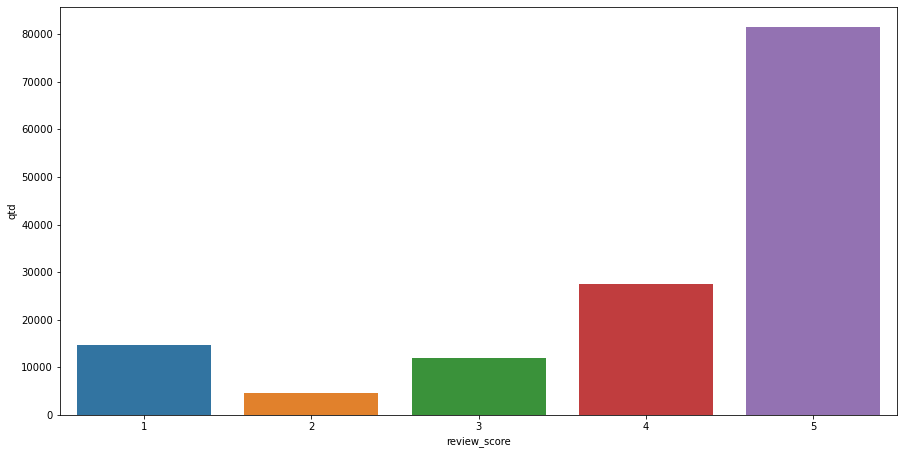

In [122]:
# fazendo um bar plot de review_scores

plt.figure(figsize=(15,7.5))
sns.barplot(x='review_score',y='qtd',data=df_review_score_count)

In [123]:
# agregação pelo valor pago e frete
df_agg_rs_price_freight = df.groupby('review_score').agg({'review_score':'count','price':'sum','freight_value':'sum'})
df_agg_rs_price_freight.columns = ['rs_count','price_sum','freight_value_sum']
df_agg_rs_price_freight = df_agg_rs_price_freight.reset_index()

# fez-se então os dois percentuais juntos
df_agg_rs_price_freight['rs_percent'] = (df_agg_rs_price_freight['rs_count']/df_agg_rs_price_freight['rs_count'].sum())*100
df_agg_rs_price_freight['price_sum_percent'] = (df_agg_rs_price_freight['price_sum']/df_agg_rs_price_freight['price_sum'].sum())*100
df_agg_rs_price_freight['freight_value_sum_percent'] = (df_agg_rs_price_freight['freight_value_sum']/df_agg_rs_price_freight['freight_value_sum'].sum())*100

display(df_agg_rs_price_freight)

,review_score,rs_count,price_sum,freight_value_sum,rs_percent,price_sum_percent,freight_value_sum_percent
0,1,14634,1.979132e+06,328684.28,10.430655,11.405916,11.261370
1,2,4594,5.481766e+05,98359.57,3.274459,3.159191,3.369992
2,3,11987,1.345792e+06,248652.45,8.543956,7.755923,8.519322
3,4,27477,3.331082e+06,571568.33,19.584741,19.197323,19.583056
4,5,81606,1.014762e+07,1671423.48,58.166189,58.481648,57.266259


In [124]:
# agrupamento dos elementos de review_score

df['review_score'] = df['review_score'].apply(lambda x: 1 if x > 3 else 0)

print(df['review_score'])

0         1
1         1
2         1
3         1
4         1
         ..
155663    0
155664    1
155665    1
155666    1
155667    1
Name: review_score, Length: 140298, dtype: int64


In [125]:
# fazendo um describe de todos os campos

display(df.describe())

,customer_city_idhm,seller_city_idhm,product_photos_qty,price,freight_value,dias_entrega,review_score
count,140298.000000,140298.000000,140298.000000,140298.000000,140298.00000,140298.000000,140298.000000
mean,0.747185,0.767030,2.259027,123.678189,20.80349,12.412187,0.777509
std,0.071912,0.056523,1.743921,185.020904,16.32796,9.826258,0.415920
min,0.484000,0.524000,1.000000,0.850000,0.00000,0.000000,0.000000
25%,0.717000,0.747000,1.000000,42.000000,13.43000,6.000000,1.000000
50%,0.768000,0.783000,2.000000,78.000000,16.74000,10.000000,1.000000
75%,0.805000,0.805000,3.000000,138.000000,22.21000,16.000000,1.000000
max,0.862000,0.862000,20.000000,6735.000000,409.68000,209.000000,1.000000


In [126]:
var_num = []
var_cat = []

for col in list(df.columns):
    if df[col].dtype != 'object':
        var_num.append(col)
    else:
        var_cat.append(col)
        
print(var_num)
print(var_cat)

['customer_city_idhm', 'seller_city_idhm', 'product_photos_qty', 'price', 'freight_value', 'dias_entrega', 'review_score']
['customer_state', 'customer_city', 'seller_state', 'seller_city', 'product_category_name']


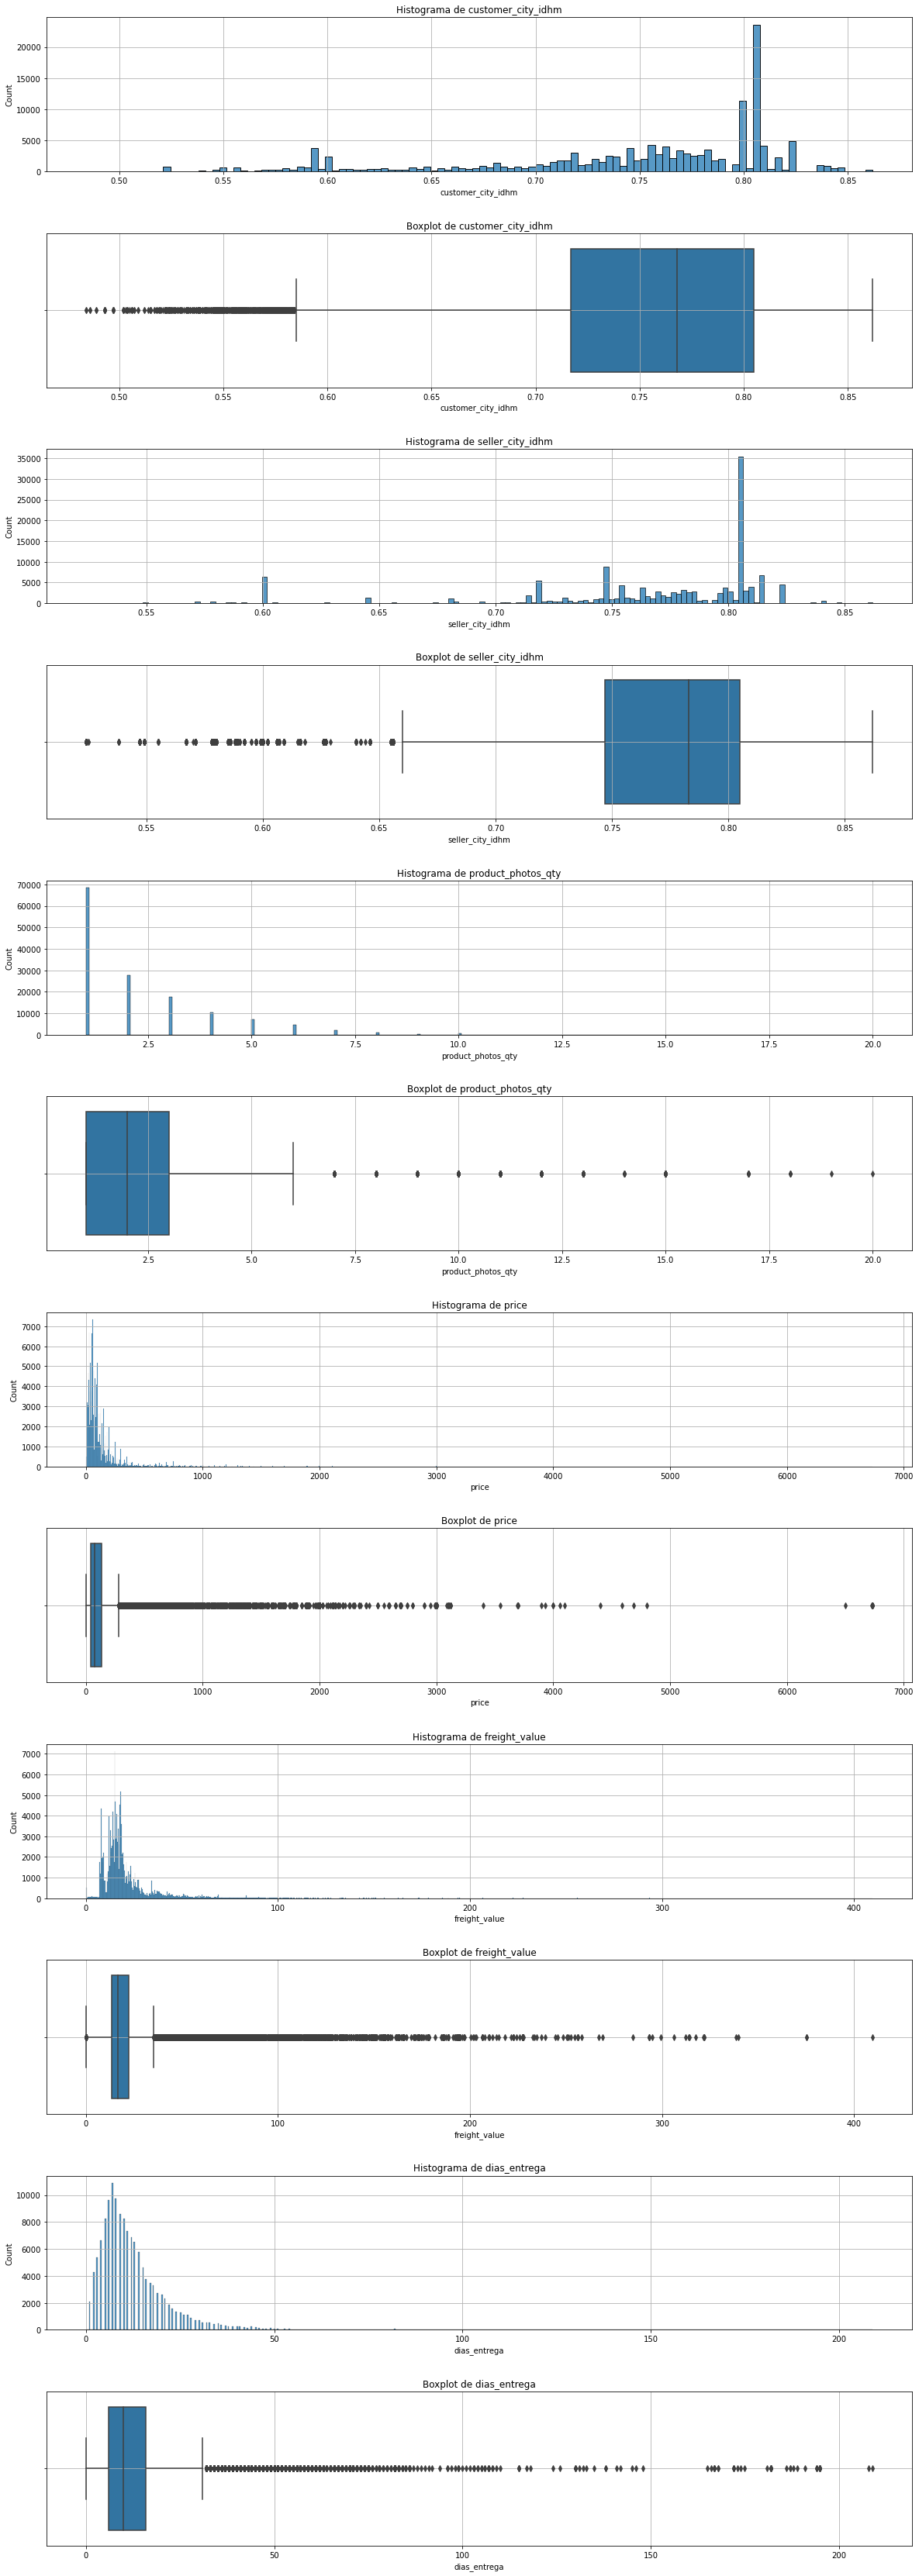

In [127]:
var_num_plot = ['customer_city_idhm', 'seller_city_idhm', 'product_photos_qty', 'price', 'freight_value', 'dias_entrega']

nrows = len(var_num_plot)*2
ncols = 1
index_num = 0

fig = plt.figure(figsize=(20,60))
fig.subplots_adjust(wspace=0.01,hspace=0.4)

for col in var_num_plot:
    
        index_num = index_num + 1
        if index_num == 13:
            break
        plt.subplot(nrows,ncols,index_num)
        plt.title('Histograma de {}'.format(col))
        plt.xlabel(col)
        sns.histplot(data=df[col])

        plt.grid()

        index_num = index_num + 1
        if index_num == 13:
            break
        plt.subplot(nrows, ncols, index_num)
        plt.title('Boxplot de {}'.format(col))
        plt.xlabel(col)
        sns.boxplot(x=df[col])

        plt.grid()
    
    
plt.show()

In [128]:
# heatmap da matriz de correlação para as variaveis numericas sem o target

df_num = df[var_num_plot]
display(df_num.head())

,customer_city_idhm,seller_city_idhm,product_photos_qty,price,freight_value,dias_entrega
0,0.716,0.771,4.0,58.9,13.29,7.0
1,0.716,0.771,2.0,124.9,14.46,6.0
2,0.772,0.771,2.0,132.9,21.42,12.0
3,0.760,0.771,4.0,45.9,16.11,4.0
4,0.760,0.771,4.0,58.9,21.32,7.0


<AxesSubplot:title={'center':'Matriz de Correlação das Variáveis Nméricas'}>

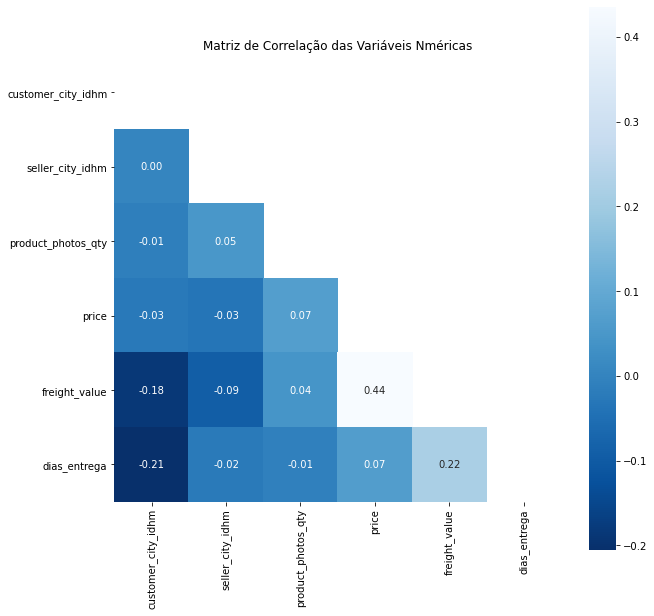

In [129]:
fig = plt.figure(figsize=(10,10))

df_num_corr = df_num.corr()

mask_triu = np.triu(df_num_corr,k=0)

plt.title('Matriz de Correlação das Variáveis Nméricas')
sns.heatmap(df_num_corr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r', mask=mask_triu)



In [130]:
# fig = plt.figure(figsize=(7,7))
# sns.pairplot(data=df,hue='review_score')
# plt.show()

## Separação do dataframe de treinamento da variável de resultado

In [131]:
# variavel resultado

y = df['review_score'].copy()

print(y)

0         1
1         1
2         1
3         1
4         1
         ..
155663    0
155664    1
155665    1
155666    1
155667    1
Name: review_score, Length: 140298, dtype: int64


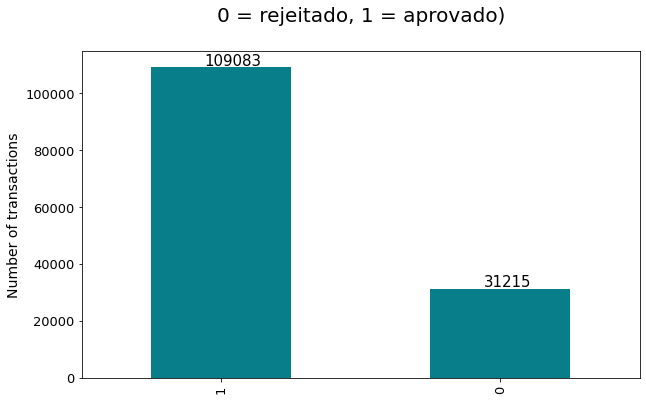

In [132]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('0 = rejeitado, 1 = aprovado)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [133]:
# variaveis preditoras

X = df.drop(columns='review_score').copy()

display(X)

,customer_state,customer_city,customer_city_idhm,seller_state,seller_city,seller_city_idhm,product_category_name,product_photos_qty,price,freight_value,dias_entrega
0,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,4.0,58.90,13.29,7.0
1,RJ,campos dos goytacazes,0.716,RJ,volta redonda,0.771,cool_stuff,2.0,124.90,14.46,6.0
2,MG,uberaba,0.772,RJ,volta redonda,0.771,cool_stuff,2.0,132.90,21.42,12.0
3,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,45.90,16.11,4.0
4,SP,jandira,0.760,RJ,volta redonda,0.771,cool_stuff,4.0,58.90,21.32,7.0
...,...,...,...,...,...,...,...,...,...,...,...
155663,MG,jenipapo de minas,0.624,SP,barrinha,0.725,esporte_lazer,1.0,7.48,15.10,7.0
155664,RN,tangara,0.608,MG,janauba,0.696,esporte_lazer,2.0,354.90,18.92,19.0
155665,RN,tangara,0.737,MG,janauba,0.696,esporte_lazer,2.0,354.90,18.92,19.0
155666,SC,tangara,0.608,MG,janauba,0.696,esporte_lazer,2.0,354.90,18.92,19.0


In [134]:
display(X.columns)

Index(['customer_state', 'customer_city', 'customer_city_idhm', 'seller_state',
       'seller_city', 'seller_city_idhm', 'product_category_name',
       'product_photos_qty', 'price', 'freight_value', 'dias_entrega'],
      dtype='object')

### Codificação das variáveis categóricas para numéricas

In [135]:
# LableEncoder para codificar as variaveis categoricas como numeros

encoder = preprocessing.LabelEncoder()

In [136]:
for col in list(X.columns):
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [137]:
display(X)

,customer_state,customer_city,customer_city_idhm,seller_state,seller_city,seller_city_idhm,product_category_name,product_photos_qty,price,freight_value,dias_entrega
0,18,676,0.716,15,513,0.771,26,4.0,58.90,13.29,7.0
1,18,676,0.716,15,513,0.771,26,2.0,124.90,14.46,6.0
2,10,3649,0.772,15,513,0.771,26,2.0,132.90,21.42,12.0
3,25,1776,0.760,15,513,0.771,26,4.0,45.90,16.11,4.0
4,25,1776,0.760,15,513,0.771,26,4.0,58.90,21.32,7.0
...,...,...,...,...,...,...,...,...,...,...,...
155663,10,1808,0.624,21,44,0.725,32,1.0,7.48,15.10,7.0
155664,19,3506,0.608,8,244,0.696,32,2.0,354.90,18.92,19.0
155665,19,3506,0.737,8,244,0.696,32,2.0,354.90,18.92,19.0
155666,23,3506,0.608,8,244,0.696,32,2.0,354.90,18.92,19.0


### Treinamento e resultados numericos do modelo

In [138]:
# cálculo e resultado do modelo

def calc_and_metrics(X,y):
    
    # separação da base de teste (20% do total de linhas) e da base de teste (80% do total de linhas)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 11)
    
    # treinamento arvore de decisao
    clf_dt = DecisionTreeClassifier(random_state=11)
    clf_dt = clf_dt.fit(X_train,y_train)
    y_pred = clf_dt.predict(X_test)

    # confusion matrix

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('tn:',tn)
    print('fp:',fp)
    print('fn:',fn)
    print('tp:',tp)

    print('\n')

    print(confusion_matrix(y_test,y_pred))

    print('\n')

    soma_pred_true = tp+fp+fn+tn

    print('soma tp,fp,fn,tp: ', soma_pred_true)
    print('len y_test: ',len(y_test))

    plot_confusion_matrix(clf_dt,X_test,y_test, labels=[1,0])
    plt.show()

    # metricas do resultado do modelo

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    accuracy = (tp+tn)/soma_pred_true
    print('precision: ',precision*100)
    print('recall: ',recall*100)
    print('F-score: ',2*recall*precision/(recall+precision))
    print('accuracy test set: ',accuracy*100)

    print('\n')

    # outra maneira de ver a acuracia da base de teste e da base de treino

    train_accuracy = np.round(clf_dt.score(X_train, y_train), 2)
    test_accuracy = np.round(clf_dt.score(X_test, y_test), 2)

    print("Training Set Mean Accuracy = " + str(train_accuracy))
    print("Test Set Mean Accuracy = " + str(test_accuracy))

    # importancia das variaveis no modelo

    df_ft_importance = pd.DataFrame({'feature_names':X.columns,'importance':clf_dt.feature_importances_})
    display(df_ft_importance.sort_values(by='importance',ascending=False))

tn: 3480
fp: 2776
fn: 3062
tp: 18742


[[ 3480  2776]
 [ 3062 18742]]


soma tp,fp,fn,tp:  28060
len y_test:  28060


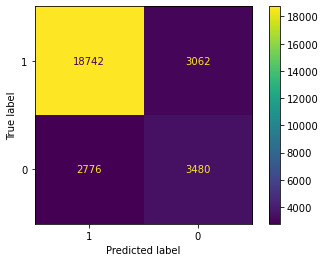

precision:  87.09917278557486
recall:  85.95670519170794
F-score:  0.8652416785928627
accuracy test set:  79.19458303635068


Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 0.79


,feature_names,importance
9,freight_value,0.170210
10,dias_entrega,0.167904
8,price,0.152729
1,customer_city,0.126950
2,customer_city_idhm,0.101836
6,product_category_name,0.071647
4,seller_city,0.064470
5,seller_city_idhm,0.050071
7,product_photos_qty,0.040590
0,customer_state,0.036739


In [139]:
calc_and_metrics(X,y)

In [140]:
# print('estimator parameters:',clf_dt.get_params())

### Aplicando SMOTE e refazendo a arvore de decisão

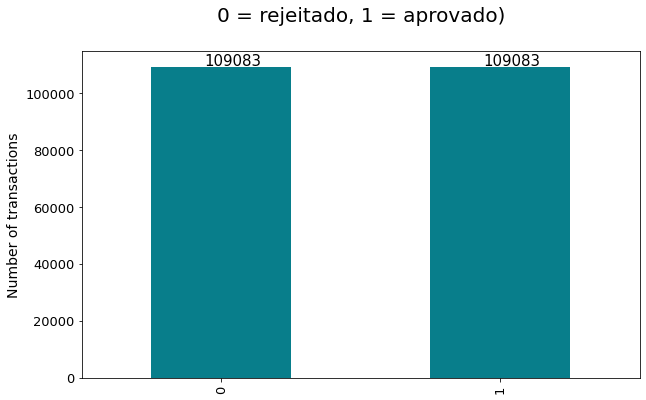

In [141]:
# aplicando o SMOTE

sm = SMOTE(random_state=10)

X_sm, y_sm = sm.fit_resample(X,y)

ax = y_sm.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('0 = rejeitado, 1 = aprovado)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [142]:
# refazendo a decision tree com a base transformada pelo SMOTE

### Treinamento e resultados numericos para o dataframe transformado com o SMOTE

tn: 19170
fp: 2706
fn: 3248
tp: 18510


[[19170  2706]
 [ 3248 18510]]


soma tp,fp,fn,tp:  43634
len y_test:  43634


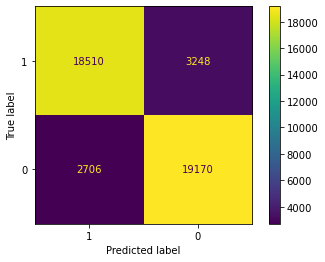

precision:  87.24547511312217
recall:  85.07215736740508
F-score:  0.8614511099734723
accuracy test set:  86.35467754503368


Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 0.86


,feature_names,importance
10,dias_entrega,0.382142
9,freight_value,0.119098
8,price,0.117746
1,customer_city,0.094574
2,customer_city_idhm,0.061210
6,product_category_name,0.057039
4,seller_city,0.054079
5,seller_city_idhm,0.040011
7,product_photos_qty,0.035271
0,customer_state,0.024202


In [143]:
calc_and_metrics(X_sm,y_sm)

In [144]:
# comparadndo as estatisticas descritivas para os dataframe original e o processado com smote

display(X.describe().transpose().round(2))
display(X_sm.describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
customer_state,140298.0,17.82,7.39,0.00,10.00,18.00,25.00,26.00
customer_city,140298.0,2172.61,1146.66,0.00,1056.00,2528.00,3190.00,3802.00
customer_city_idhm,140298.0,0.75,0.07,0.48,0.72,0.77,0.80,0.86
seller_state,140298.0,17.80,5.10,0.00,15.00,21.00,21.00,22.00
seller_city,140298.0,313.40,139.94,0.00,198.00,377.00,441.00,517.00
seller_city_idhm,140298.0,0.77,0.06,0.52,0.75,0.78,0.80,0.86
product_category_name,140298.0,36.00,22.04,0.00,13.00,32.00,55.00,72.00
product_photos_qty,140298.0,2.26,1.74,1.00,1.00,2.00,3.00,20.00
price,140298.0,123.68,185.02,0.85,42.00,78.00,138.00,6735.00
freight_value,140298.0,20.80,16.33,0.00,13.43,16.74,22.21,409.68


,count,mean,std,min,25%,50%,75%,max
customer_state,218166.0,17.59,7.23,0.00,11.00,18.00,25.00,26.00
customer_city,218166.0,2173.67,1144.50,0.00,1056.00,2533.00,3177.00,3802.00
customer_city_idhm,218166.0,0.75,0.07,0.48,0.72,0.76,0.80,0.86
seller_state,218166.0,17.84,4.99,0.00,15.00,21.00,21.00,22.00
seller_city,218166.0,313.18,139.08,0.00,198.00,377.00,441.00,517.00
seller_city_idhm,218166.0,0.77,0.05,0.52,0.75,0.78,0.80,0.86
product_category_name,218166.0,35.67,21.84,0.00,13.00,32.00,55.00,72.00
product_photos_qty,218166.0,2.25,1.69,1.00,1.00,1.94,3.00,20.00
price,218166.0,123.10,181.29,0.85,42.57,77.90,137.00,6735.00
freight_value,218166.0,20.91,15.97,0.00,13.65,16.86,22.45,409.68
